# Hyperspectral Image Masking Process Using MLP

The sample file comes from:<br> 
`Sample Dataset > Co-registered > 1M-10-0001 > VNIR-SWIR`<br>
`Sample Dataset > Minerology > 1M-10-0001 > DDH`<br>
<font color = 'red'>**VNIR-SWIR** is the very directory contains what we are going to operaterate!</font><br>
<font color = 'green'>Please put the .hdr file and the corresponding dat file into the LWIR where this notebook located!</font><br>
<font color = 'blue'>Please put all the mask within DDH folder into the demo folder!</font>

## Import basic required packages

In [80]:
import os
import numpy 
import numpy as np
from spectral import *
from spectral.io import envi
import spectral.io.envi as envi 
import cv2
import glob 

import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA

In [81]:
import warnings
warnings.filterwarnings("ignore")

## Load Hyperspectral data (.hdr and .dat)
**<font color='red'>Please copy and paste the directory of the folder where hdrs are in, make sure that you replace "\\" as "\\\\".</font>**</br>
Before you go, make sure that the directory is set in where the original file lies in!

In [82]:
# set directory
os.getcwd()
os.chdir('C:\\Users\\Raymo\\Demo\\VNIR-SWIR (VIEW THIS ONLY)') # target directory

The code block above only need to execute for one time

**Then get the list of the corresponding .hdr and .dat**

In [83]:
lst = os.listdir()
lst

['DNR_Pasadena_1M-10-0001_10_000_000',
 'DNR_Pasadena_1M-10-0001_10_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_11_000_000',
 'DNR_Pasadena_1M-10-0001_11_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_12_000_000',
 'DNR_Pasadena_1M-10-0001_12_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_13_000_000',
 'DNR_Pasadena_1M-10-0001_13_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_14_000_000',
 'DNR_Pasadena_1M-10-0001_14_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_15_000_000',
 'DNR_Pasadena_1M-10-0001_15_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_16_000_000',
 'DNR_Pasadena_1M-10-0001_16_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_17_000_000',
 'DNR_Pasadena_1M-10-0001_17_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_18_000_000',
 'DNR_Pasadena_1M-10-0001_18_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_19_000_000',
 'DNR_Pasadena_1M-10-0001_19_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_1_000_000',
 'DNR_Pasadena_1M-10-0001_1_000_000.hdr',
 'DNR_Pasadena_1M-10-0001_20_000_000',
 'DNR_Pasadena_1M-10-0001_20_000_000.hdr',
 'DNR_Pasadena_1M-

To open the corresponding hdr file, please input the corresponding row you want to read.

In [84]:
row = input('Please input the number of row indicated in .hdr file. For example, \
DNR_Pasadena_1M-10-0001_3_000_000.hdr means third row, the number MUST between 1 and 20 and is INTEGER!')
if not isinstance(eval(row), int):
    print('Please enter a valid integer! ')
if eval(row) > 20 or eval(row) <= 0:
    print('Please enter an INTEGER BETWEEN 1 and 20')

Please input the number of row indicated in .hdr file. For example, DNR_Pasadena_1M-10-0001_3_000_000.hdr means third row, the number MUST between 1 and 20 and is INTEGER!1


ImageView object:
  Display bands       :  [211, 101, 45]
  Interpolation       :  <default>
  RGB data limits     :
    R: [586.0, 12045.0]
    G: [600.0, 7473.0]
    B: [577.0, 6633.0]

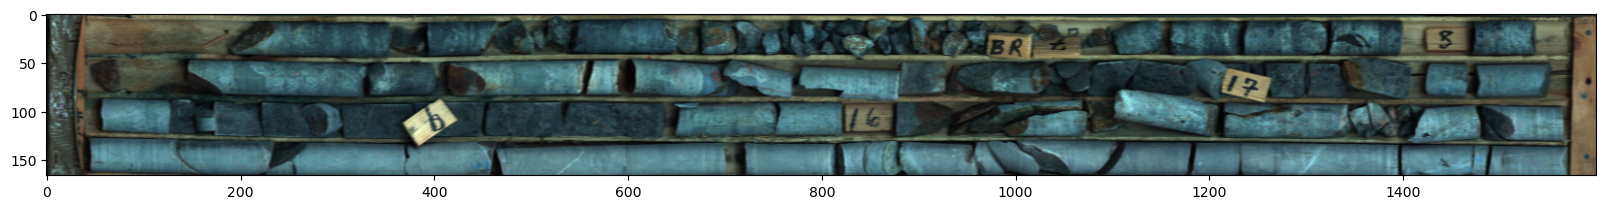

In [85]:
# hdr data 
img = envi.open(f'DNR_Pasadena_1M-10-0001_{row}_000_000.hdr',f'DNR_Pasadena_1M-10-0001_{row}_000_000')
imshow(img, figsize = (20,8))


## Load And Explore Mask data (DDH) 
In this project, we mainly focus on the mineraology component "Muscovite", and "White-Mica" due to their relative data balance.<br>
You can expand the DDH folder with other components.<br>
<font color = 'red'>Please check the number of the row with relatively balanced data before choosing the corresponding hdr file! </font>

**Get the list of the DDH file, which contains the mask data for the corresponding mineral component.**

In [87]:
os.chdir('C:\\Users\\Raymo\\Demo\\DDH')
lst = os.listdir()
lst
# print(lst)

['DNR_Pasadena_1M-10-0001_20_000_000_row_4_1_Rock_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_Any_Mineral_Classified_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_chemistry_Alunite_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_chemistry_Amphibole_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_chemistry_Biotite_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_chemistry_Carbonate_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_chemistry_Chl_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_chemistry_Epidote_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_chemistry_White-Mica_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_composite_570(R)_790(G)_855(B)_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_composite_Gyp(R)_Prh(O)_Topaz(Y)_Jaro(G)_Alun(B)_Tur(C)_Carb(M)_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_000_000_row_4_composite_Plag(R)_Fp-Mnst(Y)_KFp-NaK(G)_Fp-MnstMid(C)_KFp-Micro(B)_Fp-Mnst2(M)_DDH.PNG',
 'DNR_Pasadena_1M-10-0001_20_00

<font color = 'red'>**Get the name of the mineral component that has corresponding mask**</font>

In [88]:
res = []
for i in lst:
    if 'Mask' in i or 'mask' in i:
        res.append(i[49:-13])
# print(res)
res
# len(res) 29, which means there are 29 mineral component that has the corresponding mask
# However, there are two components ('LWIR-Quartz', 'SulphideMWIR-EXP') that seems to be not binary mask. According to the EDA.

['Alunite',
 'Amphibole',
 'Biotite',
 'Carbonate',
 'Chlorite',
 'chloritoid',
 'Dickite',
 'Epidote',
 'FeOH',
 'Grunerite',
 'Gypsum',
 'Halloysite',
 'Hematite',
 'Illite',
 'Jarosite',
 'Kaolinite',
 'LWIR-Quartz',
 'Magnetite',
 'Muscovite',
 'Pen-yellow',
 'Prehnite',
 'Pyrophyllite',
 'Serpentine',
 'Smectite',
 'SulphideMWIR-EXP',
 'Talc',
 'Topaz',
 'Tourmaline',
 'White-Mica']

**Please select the component from the list shown above!**

Please input the component corresponding to the mask, thanks.        White-Mica


ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

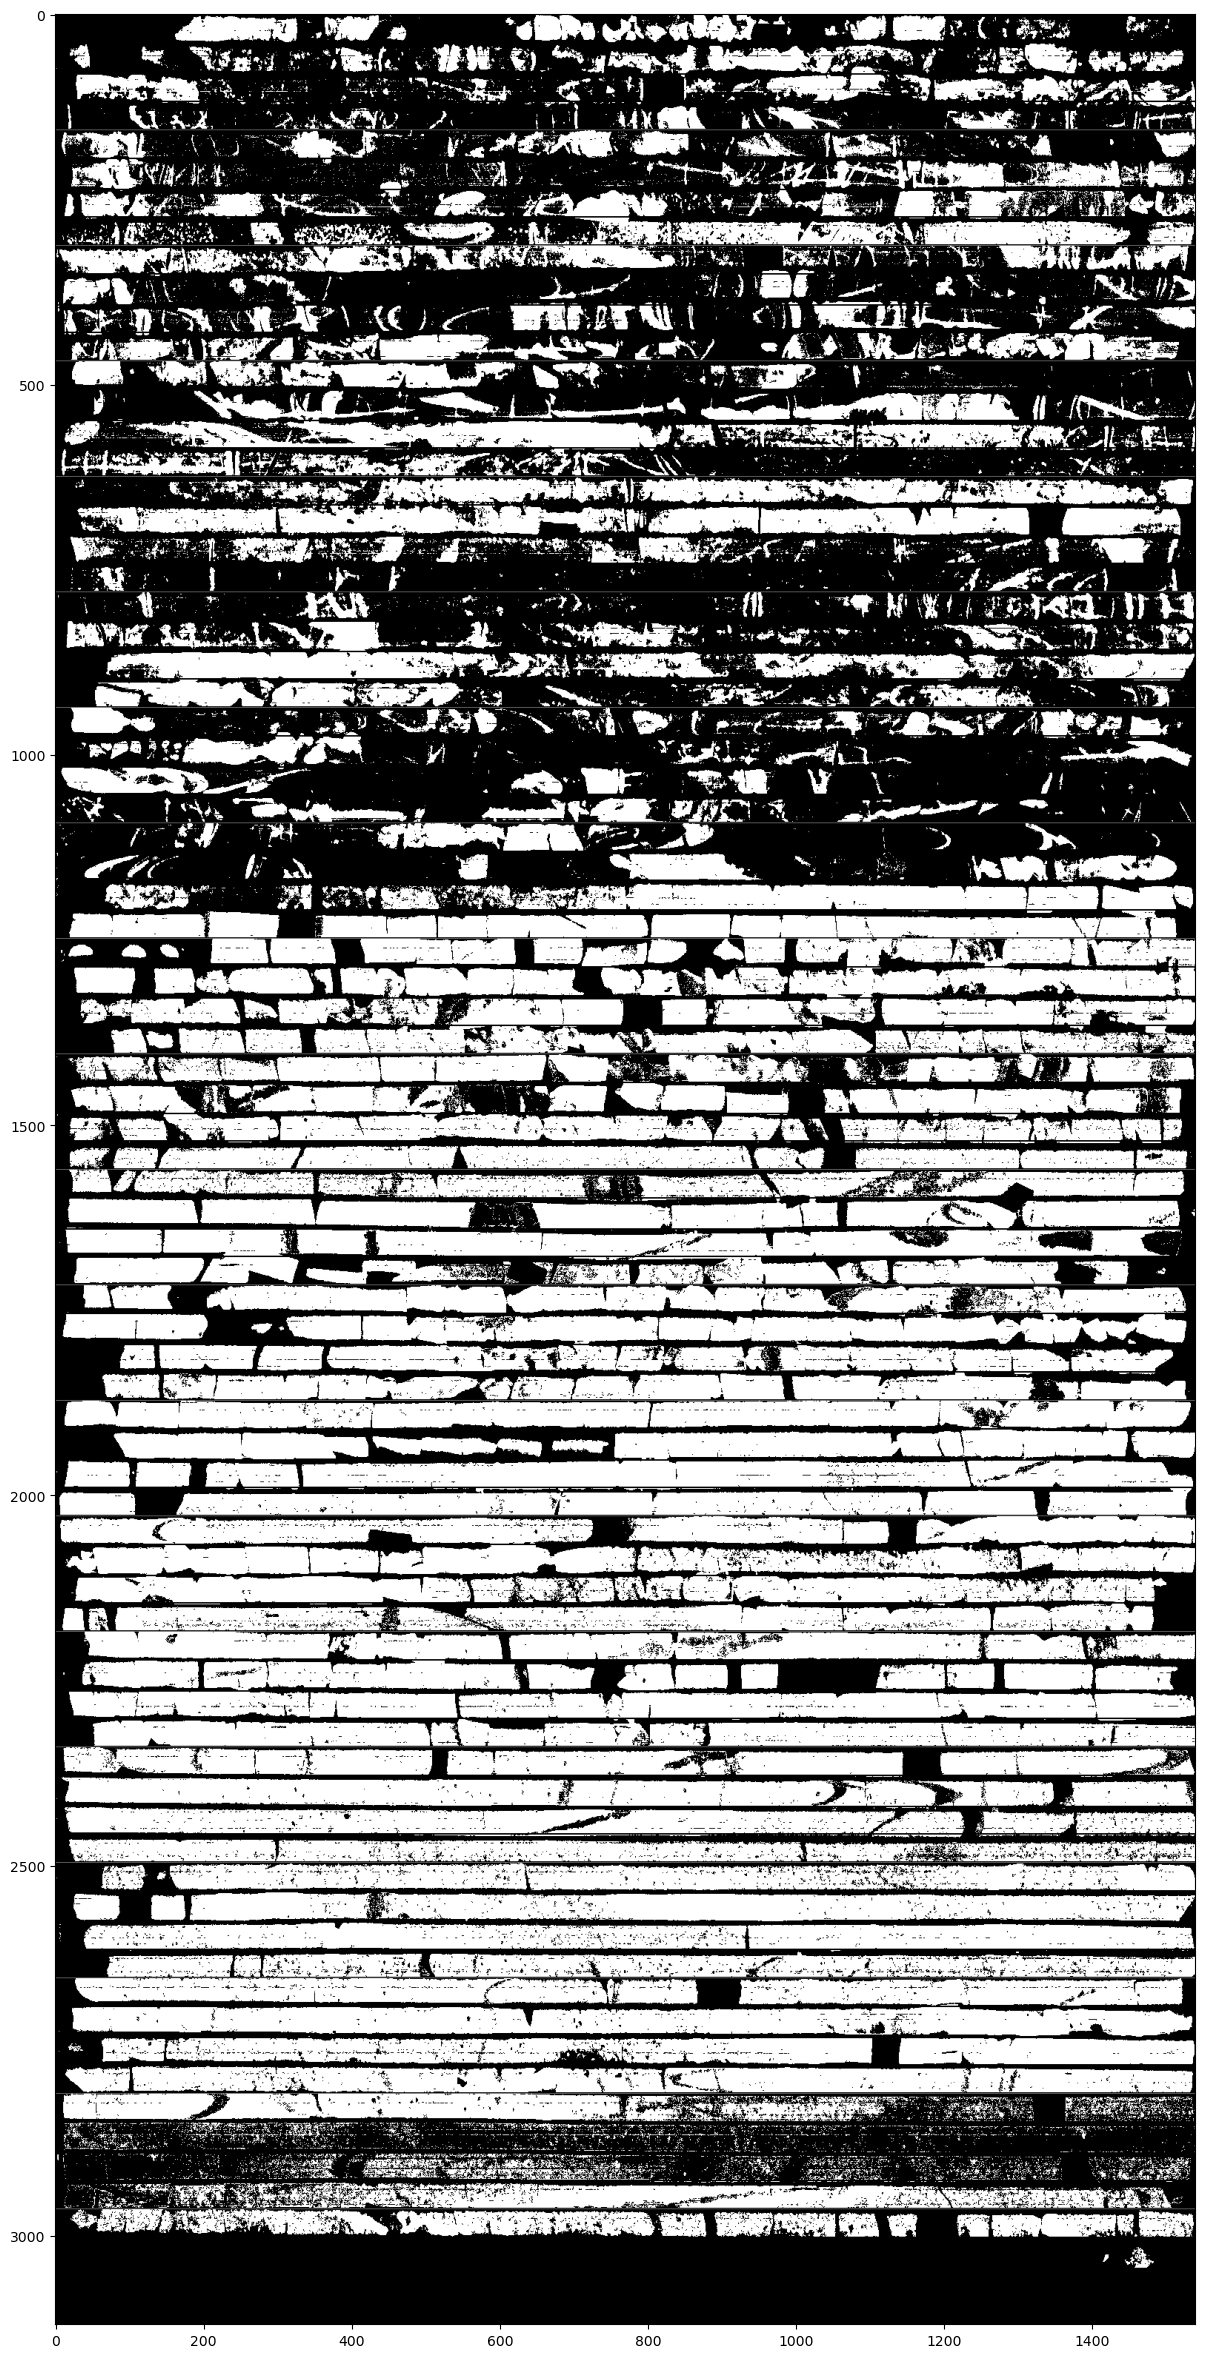

In [89]:
import matplotlib.image as mpimg
component = input('Please input the component corresponding to the mask, thanks.        ') # White-Mica is shown in this sample
if component not in res: raise ValueError('Please enter a valid mineral component!       ')
a = mpimg.imread(f'DNR_Pasadena_1M-10-0001_20_000_000_row_4_mineral_{component}_Mask_DDH.PNG')
imshow(a, figsize = (70,30), aspect=1)


<font color = 'blue'>Please **write down** the number of the row with relatively balanced data. </font><br>
<font color = 'green'>You may want to input another mineral component if it's almost totally black...</font>

## Data preprocessing

Preprocessing of hdr file<br>
<font color = 'red'>First 6 rows and 30 columns doesn't correspond to the valid information on mask!</font>

In [90]:
arr = np.asarray(img.load())
hdr = arr[6:, 30:]

Preprocessing of the mask
<font color='red'>Each mask row (4 rows of sample takes up 156 pixels, <b>the first row of which doesn't contain any info!</b>)</font>

(155, 1540, 3)


ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

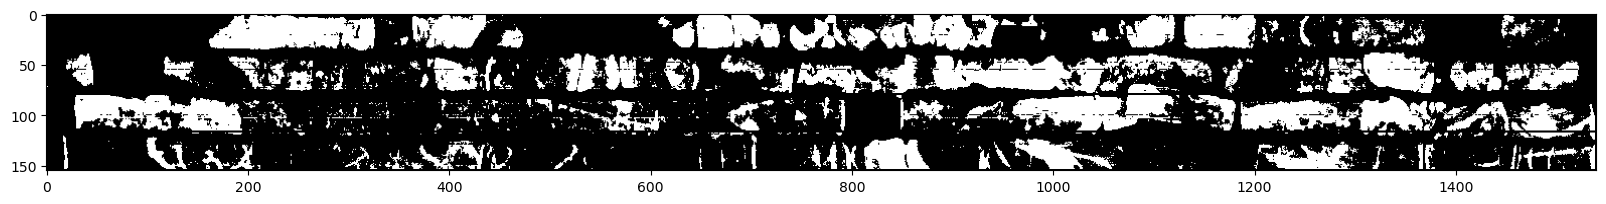

In [91]:
corr_mask = a[1 + (156 * (int(row) - 1)):156 + (156 * (int(row) - 1)), 0:]
print(corr_mask.shape)
imshow(corr_mask, figsize = (20,8))

<font color = 'red'>You may want to reset the number of the row based on the observation of the entire mask file if the row you have choosen is **almost totally** <font color = 'black'>**black**</font>.</font>

## Data preparation for ML

This method will intercept a rectangular area with a custom size in the picture, extract every pixel array within the area, and split the training set and test set according to a certain ratio.<br>
<br>
*Arguments:*<br>
*hyperspect*: numpy ndarray, hyperspectral array with shape (x,y,z).<br>
*ddh*: numpy ndarray, ddh mask array with shape (x,y,z), same as the shape of hyperspect.<br>
*loc*: list like [a,b], where 'a' and 'b' are the coordinates of the top-left point of the rectangle area.<br>
*length*: int, length of the rectangle area.<br>
*width*: int, wiidth of the rectangle area.<br>
*ratio*: ratio of the test set size, 0 < ratio < 1.

In [200]:
# !pip install keras
# !pip install tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [201]:
def data_prep (hyperspect, ddh, loc, length, width, ratio):
    # intialize using the starting location
    hyp = hyperspect[loc[0],loc[1]]
    mask = np.array([1])
    
    # check if outOfBound
    if loc[0]+width > hyperspect.shape[0]-1 or loc[1]+length > hyperspect.shape[1]-1 :
        raise Exception("Warning: length or width too large..")
    
    # add all pixel arrays within area
    for i in range(loc[0], loc[0]+width):
        for j in range(loc[1], loc[1]+length):
            hyp = np.vstack((hyp, hyperspect[i,j]))
            
            # For ddh mask, we extract it categorically.
            # For pixel channel = 112 or 255, we append value 1.
            # For pixel channel = 0, we append value 0
            if ddh[i,j,1] > 0: # note that the 3rd dimension of the mask contains 0 and 1 ONLY!
                mask = np.concatenate((mask,[1]))
            else:
                mask = np.concatenate((mask,[0]))
            
    
    # delete the first element that is repeated
    hyp = hyp[1:]
    mask = mask[1:]
    
    X_train, X_test, y_train, y_test = train_test_split(hyp, mask, test_size=ratio)
    
    # change the y set into categorical set 
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return hyp, mask, X_train, X_test, y_train, y_test



In [202]:
start_point = input('Enter the start point (upper left point) of the pixel you want to take, eg: [2, 2]     ')
length = input('Enter the HORIZONTAL length of the pixel you want to take.     ')
width = input('Enter the VERTICAL width of the pixel you want to take.     ')

Enter the start point (upper left point) of the pixel you want to take, eg: [2, 2]     [0,610]
Enter the HORIZONTAL length of the pixel you want to take.     100
Enter the VERTICAL width of the pixel you want to take.     90


In [203]:
loc = eval(start_point)
h, m, X_train, X_test, y_train, y_test = data_prep(hdr, corr_mask, loc, eval(length), eval(width), 0.05)

In [204]:
print("Hypspec: ", str(h.shape))
print("DDH:     ", str(m.shape))
print("X_train: ", str(X_train.shape))
print("y_train: ", str(y_train.shape))
print("X_test:  ", str(X_test.shape))
print("y_test:  ", str(y_test.shape))

Hypspec:  (9000, 1223)
DDH:      (9000,)
X_train:  (8550, 1223)
y_train:  (8550, 2)
X_test:   (450, 1223)
y_test:   (450, 2)


In [205]:
y_test[:,0].mean()

0.6111111

If the output above is **> 0.75** or **<0.25**, it means the sample frame you have selected is very inbalanced!!

## Preprocessing of the Train and Test Array
Since we have extract the array information for each pixel (an array contains 1223 numbers), to extract its abnomality (fluctration information), we use the next value - current value as its equivalant of the deriviation.

In [206]:
def x_prep(x_train, x_test) -> object:
    # x_train
    for i in x_train:
        for j in range(len(i) - 1):
            i[j] = int(i[j + 1]) - int(i[j])  # next val - curr val -- deriviation
    
    # x_test
    for k in x_test:
        for l in range(len(k) - 1):
            k[l] = int(k[l + 1]) - int(k[l])
            
    return x_train[:, :x_train.shape[1] - 1], x_test[:, :x_test.shape[1] - 1]
    

**You can execute the block above n time to gain an n order derivation of the array**,<br>
This is done to extract the feature within the array within each pixel.

In [207]:
n_order_derivation = int(input('Please input the n of the order of the deriviation, usually 1 or 2.    '))
for i in range(n_order_derivation):
    X_train, X_test = x_prep(X_train, X_test)

Please input the n of the order of the deriviation, usually 1 or 2.    1


## Machine Learning Model -- MLP

In [208]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

**Input shape = (1223 - n,)**, n stands for the # of the deriviation order<br>
<font color='red'>In this case, n = 1, therefore, input shape is 1223 - 1 = 1222.</font>

In [209]:
model = Sequential([
            Dense(1223 - n_order_derivation, activation='softplus', input_shape=(1223 - n_order_derivation,)),
            # Dense(2048, activation = 'gelu'),
            Dense(800, activation='tanh'),
            Dense(270, activation='elu'),
            Dense(95, activation='tanh'),
            Dense(2, activation='softmax'),
        ])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 1222)              1494506   
                                                                 
 dense_38 (Dense)            (None, 800)               978400    
                                                                 
 dense_39 (Dense)            (None, 270)               216270    
                                                                 
 dense_40 (Dense)            (None, 95)                25745     
                                                                 
 dense_41 (Dense)            (None, 2)                 192       
                                                                 
Total params: 2715113 (10.36 MB)
Trainable params: 2715113 (10.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [210]:
# Compile the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [211]:
# Training.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10)

Epoch 1/10
855/855 [==============================] - 13s 15ms/step - loss: 0.2572 - accuracy: 0.8901 - val_loss: 0.1840 - val_accuracy: 0.9356
Epoch 2/10
855/855 [==============================] - 13s 15ms/step - loss: 0.1392 - accuracy: 0.9475 - val_loss: 0.1746 - val_accuracy: 0.9267
Epoch 3/10
855/855 [==============================] - 13s 15ms/step - loss: 0.1036 - accuracy: 0.9620 - val_loss: 0.1610 - val_accuracy: 0.9467
Epoch 4/10
855/855 [==============================] - 13s 15ms/step - loss: 0.0819 - accuracy: 0.9723 - val_loss: 0.1713 - val_accuracy: 0.9467
Epoch 5/10
855/855 [==============================] - 14s 16ms/step - loss: 0.0596 - accuracy: 0.9826 - val_loss: 0.1752 - val_accuracy: 0.9511
Epoch 6/10
855/855 [==============================] - 14s 16ms/step - loss: 0.0408 - accuracy: 0.9898 - val_loss: 0.2360 - val_accuracy: 0.9467
Epoch 7/10
855/855 [==============================] - 14s 16ms/step - loss: 0.0328 - accuracy: 0.9911 - val_loss: 0.3457 - val_accuracy:

In [212]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

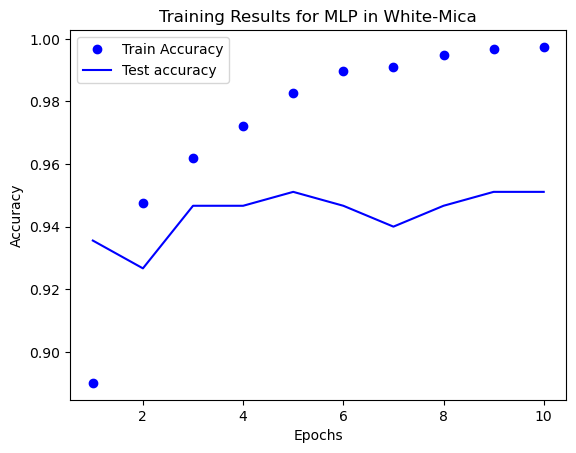

In [224]:
# Plot the training accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = []
for i in range(10):
    epochs.append(i+1)

plt.plot(epochs, acc, 'bo', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Test accuracy')
plt.title('Training Results for MLP in White-Mica')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [214]:
y_test
model.predict(X_test)

15/15 [==============================] - 0s 4ms/step


array([[9.9994457e-01, 5.5409240e-05],
       [7.4294134e-05, 9.9992573e-01],
       [4.1771887e-05, 9.9995828e-01],
       [8.3113468e-05, 9.9991691e-01],
       [9.9994457e-01, 5.5409455e-05],
       [4.1763484e-05, 9.9995828e-01],
       [4.1762847e-05, 9.9995828e-01],
       [9.9994457e-01, 5.5409349e-05],
       [9.9994457e-01, 5.5409455e-05],
       [9.9994457e-01, 5.5409455e-05],
       [9.9994457e-01, 5.5409455e-05],
       [4.1763044e-05, 9.9995828e-01],
       [4.1764677e-05, 9.9995828e-01],
       [9.9994457e-01, 5.5409349e-05],
       [9.9994457e-01, 5.5409349e-05],
       [9.9994457e-01, 5.5409455e-05],
       [9.9994457e-01, 5.5409455e-05],
       [4.1770254e-05, 9.9995828e-01],
       [4.1762767e-05, 9.9995828e-01],
       [9.9994457e-01, 5.5409455e-05],
       [9.9994457e-01, 5.5409455e-05],
       [9.9994457e-01, 5.5409349e-05],
       [4.1769061e-05, 9.9995828e-01],
       [9.9994457e-01, 5.5409455e-05],
       [9.9994457e-01, 5.5469620e-05],
       [4.1766114e-05, 9.

### Conduct External Test

Choose another different hdr file

In [215]:
# set directory
os.chdir('C:\\Users\\Raymo\\Demo\\VNIR-SWIR (VIEW THIS ONLY)') # target directory
external_row = input('Please input the number of row indicated in .hdr file. For example, \
DNR_Pasadena_1M-10-0001_3_000_000.hdr means third row, the number MUST between 1 and 20 and is INTEGER!')
if not isinstance(eval(external_row), int):
    raise ValueError('Please enter a valid integer! ')
if eval(external_row) > 20 or eval(external_row) <= 0:
    raise ValueError('Please enter an INTEGER BETWEEN 1 and 20')
if eval(external_row) == eval(row):
    raise ValueError("You had better select a different hdr file")

Please input the number of row indicated in .hdr file. For example, DNR_Pasadena_1M-10-0001_3_000_000.hdr means third row, the number MUST between 1 and 20 and is INTEGER!3


In [216]:
# read and process selected "external" hdr file
external_img = envi.open(f'DNR_Pasadena_1M-10-0001_{external_row}_000_000.hdr',f'DNR_Pasadena_1M-10-0001_{external_row}_000_000')
external_arr = np.asarray(external_img.load())
external_hdr = arr[6:, 30:]

(155, 1540, 3)


ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

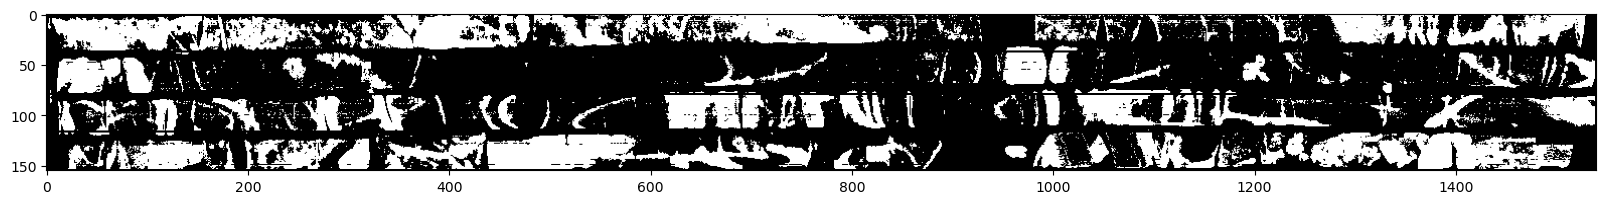

In [217]:
external_corr_mask = a[1 + (156 * (int(external_row) - 1)):156 + (156 * (int(external_row) - 1)), 0:]
print(external_corr_mask.shape)
imshow(external_corr_mask, figsize = (20,8))

<font color='red'>Please choose the corresponding test sample frame based on the mask image shown above, ensure that **the data is BALANCED**</font><br>
To save time, **don't choose too large external test sample frame!!**

In [218]:
start_point = input('Enter the start point (upper left point) of the pixel you want to take, eg: [2, 2]     ')
length = input('Enter the HORIZONTAL length of the pixel you want to take.     ')
width = input('Enter the VERTICAL width of the pixel you want to take.     ')

Enter the start point (upper left point) of the pixel you want to take, eg: [2, 2]     [0,310]
Enter the HORIZONTAL length of the pixel you want to take.     70
Enter the VERTICAL width of the pixel you want to take.     80


In [219]:
def external_data_prep (hyperspect, ddh, loc, length, width):
    # intialize using the starting location
    hyp = hyperspect[loc[0],loc[1]]
    mask = np.array([1])
    
    # check if outOfBound
    if loc[0]+width > hyperspect.shape[0]-1 or loc[1]+length > hyperspect.shape[1]-1 :
        raise Exception("Warning: length or width too large..")
    
    # add all pixel arrays within area
    for i in range(loc[0], loc[0]+width):
        for j in range(loc[1], loc[1]+length):
            hyp = np.vstack((hyp, hyperspect[i,j]))
            
            # For ddh mask, we extract it categorically.
            # For pixel channel = 112 or 255, we append value 1.
            # For pixel channel = 0, we append value 0
            if ddh[i,j,1] > 0: # note that the 3rd dimension of the mask contains 0 and 1 ONLY!
                mask = np.concatenate((mask,[1]))
            else:
                mask = np.concatenate((mask,[0]))
            
    
    # delete the first element that is repeated
    hyp = hyp[1:]
    mask = mask[1:]
    
    X_external_test, y_external_test = hyp, mask

    
    # change the y set into categorical set 
    y_external_test = to_categorical(y_external_test)
    
    return hyp, mask, X_external_test, y_external_test




loc = eval(start_point)
h, m, X_external_test, y_external_test = external_data_prep(external_hdr, external_corr_mask, loc, eval(length), eval(width))


In [220]:
def x_external_prep(X_external_test) -> object:
    for i in X_external_test:
        for j in range(len(i) - 1):
            i[j] = int(i[j + 1]) - int(i[j])  # next val - curr val -- deriviation
    return X_external_test[:, :X_external_test.shape[1] - 1]
X_external_test = x_external_prep(X_external_test)

Check the balance of the data, should be <=0.75 and >=0.25

In [221]:
y_external_test[:,1].mean()

0.35732144

**Conduct External Test**

In [222]:
score = model.evaluate(X_external_test, y_external_test, verbose = 0)
print(f'Test loss: {score[0]}; test accurracy: {score[1]}')

Test loss: 3.303799867630005; test accurracy: 0.6512500047683716
